In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Reading and preparing the data

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.Gender = LabelEncoder().fit_transform(data.Gender) # 1 -> Male, 2 -> Female 

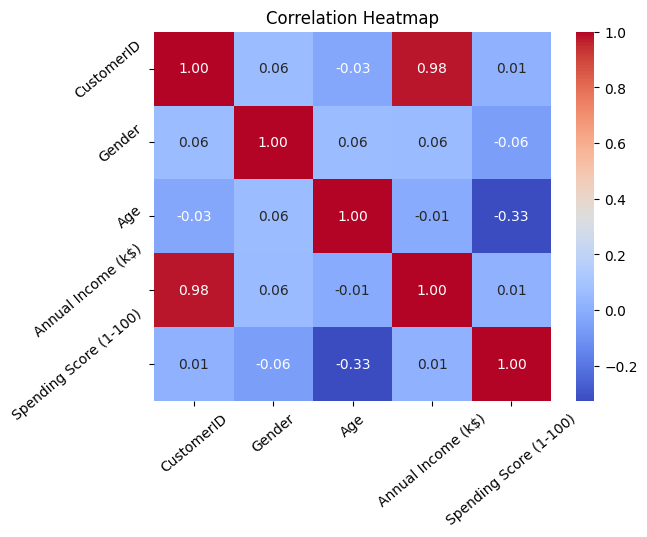

In [14]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=40)
plt.yticks(rotation=40)
plt.show()

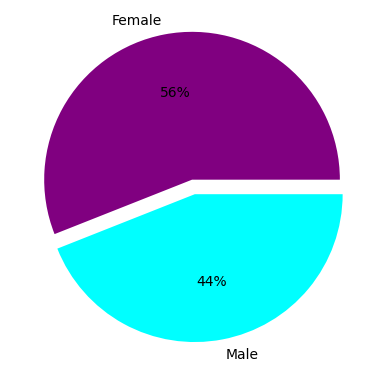

In [35]:
# Gender Count
plt.pie(data.Gender.value_counts(), labels=['Female', 'Male'],
        explode=[0.1, 0], autopct='%.0f%%', colors=['purple', 'cyan'])
plt.show()

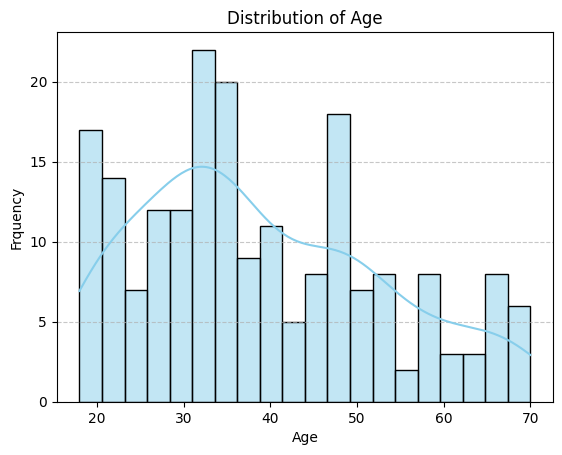

In [54]:
sns.histplot(data.Age, kde=True, bins=20, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Age')
plt.ylabel('Frquency')
plt.show()

In [72]:
x_train, x_test = data[:150], data[150:]

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

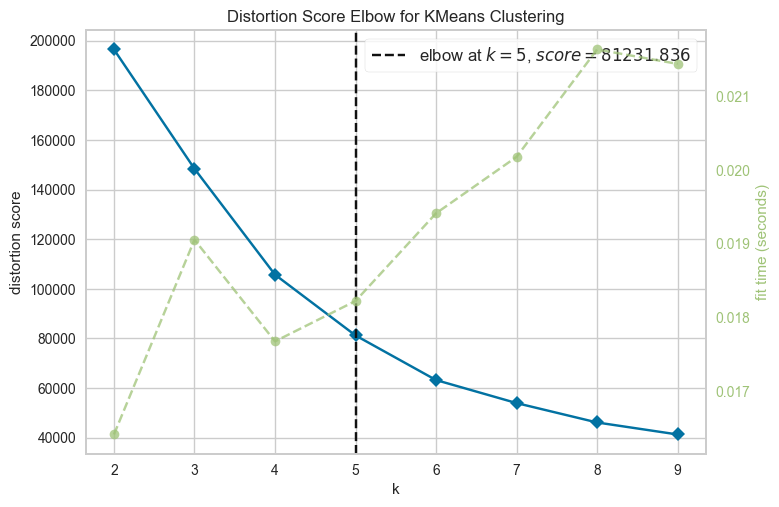

In [83]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(x_train)
visualizer.show()
plt.show()

In [74]:
KModel = KMeans(n_clusters=5, random_state=42)
KModel.fit(data)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [89]:
KModel.cluster_centers_

array([[ 92.53030303,   0.42424242,  42.72727273,  57.75757576,
         49.46969697],
       [ 24.2       ,   0.44      ,  25.56      ,  26.48      ,
         76.24      ],
       [162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [164.        ,   0.52777778,  40.80555556,  87.91666667,
         17.88888889],
       [ 34.29411765,   0.35294118,  46.08823529,  32.29411765,
         30.05882353]])

In [75]:
data['KModel'] = KModel.labels_

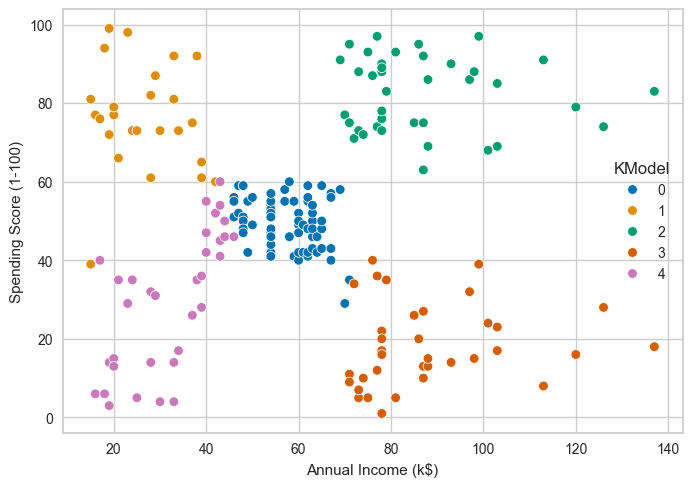

In [80]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KModel', palette='colorblind')
plt.show()

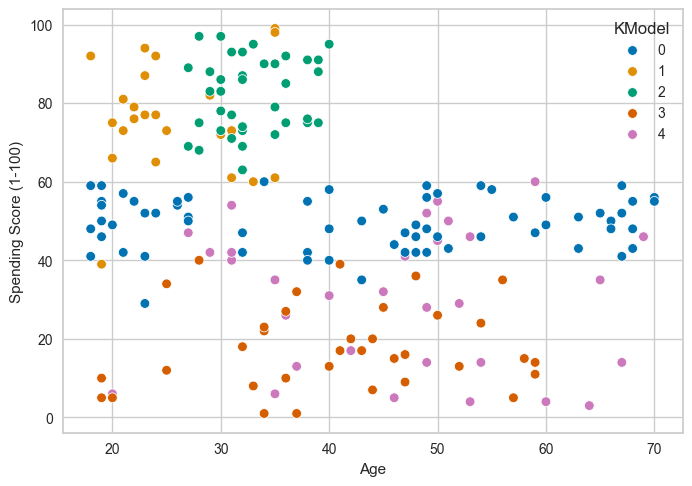

In [81]:
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='KModel', palette='colorblind')
plt.show()